**OBJETIVO:** FAZER UM ALGORITMO CAPAZ DE ANALISAR AS COLUNAS DE UMA IMAGEM DE GEL DE CORRIDA E CONSTRUIR UM GRÁFICO COM BASE NA INTENSIDADE DA COR BRANCA DE CADA BANDA.

**Programadores:** André Araújo e Beatriz Borges

**Contato:** andre.araujocaetano.profissional@gmail.com / beatrizborgesribeiro2@gmail.com

## Bibliotecas

**Bibliotecas utilizadas:**

In [2]:
import random # Gerar números aleatórios
import numpy as np # Cálculo com matrizes
import matplotlib.pyplot as plt # Abrir e gerir gráficos

# Lidar com imagens
from PIL import Image
from skimage import data
from skimage import filters, restoration, util
from skimage.color import rgb2gray
from skimage import io, color
import skimage as ski

## Resumo geral 

O **objetivo** do programa codado em python é analisar imagens de géis de corrida de proteína **(SDS-PAGE)**, separados em colunas e analisar a intensidade da luz de cada banda da coluna selecionada para **quantificar** e/ou comparar a presença de proteínas em uma ou mais bandas.

## Funções

In [18]:
def processamento_imagem(imagem_original, mostrar):
    """Processa a imagem que recebe, transforma na escala de cinza e a devolve em formato de array do numpy
    
    Args:
      imagem_original: imagem em formato numpy array.
      mostrar: variável do tipo bool que vai definir se no output vai conter ou não a imagem processada.
    """

    altura, largura, channels = imagem_original.shape # Obter os tamanhos da imagem
    print(f"Tamanho da imagem: {largura} x {altura} pixels") # Mostrar os tamanhos da imagem
    
    gray_image = color.rgb2gray(imagem_original) # Transformar na escala de preto e branco
    gray_image = 1 - gray_image # inverter onde esta branco vira preto e vice versa

    if mostrar == True: # se True então você verá a imagem no output

        plt.imshow(gray_image, cmap='gray') 
        plt.title('Imagem em Preto e Branco')
        plt.subplots_adjust(left=1, right=4.0, top=1, bottom=0.2)  # Ajuste das margens
        plt.axis()
        plt.show()

    return gray_image

def recortar_imagem(imagem_cinza, x_coordenadas, y_coordenadas, mostrar):
    """Recorta a imagem que recebe para as bandas que você escolher seguindo a lógica de pixeis
    
    Args:
      imagem_cinza: imagem tratada em grayscale com a função anterior.
      x_coordenadas: lista contendo os pontos de corte do eixo x.
      y-coordenadas: lista contendo os pontos de corte do eixo y.
      mostrar: variável do tipo bool que vai definir se no output vai conter ou não a imagem cortada.
    """

    x_inicial = x_coordenadas[0] # x começo do recorte
    x_final = x_coordenadas[1] # x  fim do recorte

    y_inicial = y_coordenadas[0] # y começo do recorte
    y_final = y_coordenadas[1] # y fim do recorte

    recorte = imagem_cinza[y_inicial:y_final, x_inicial:x_final] # recortar a imagem tratada nos pontos de interesse

    x_line = recorte.shape[1] // 2 # traçar uma linha no meio da imagem recortada para obter os dados de intensidade de luz

    if mostrar == True: # se sim vai plotar o recorte e o ponto traçado
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
        # Primeiro gráfico: Recorte da Imagem
        axes[0].imshow(recorte, cmap='gray')
        axes[0].set_title('Recorte da Imagem')
        axes[0].axis('off')
    
        # Segundo gráfico: Recorte com Linha Traçada
        axes[1].imshow(recorte, cmap='gray')
        axes[1].axvline(x=x_line, color='red', linestyle='-')
        axes[1].set_title('Recorte com Linha Traçada')
        axes[1].axis('off')
    
        plt.tight_layout()
        plt.show()

    return recorte # imagem recortada

def plotar_resultados(lista_recorte):
    """Utiliza a lista com cada recorte da imagem do gel para plotar os gráficos e comparar as bandas de cada coluna.
    
    Args:
      lista_recorte: uma lista contendo cada recorte.
    """

    fig, axes = plt.subplots(1, figsize=(12, 2))
    fig.subplots_adjust(left=0.5, right=2.0, top=1, bottom=0.2)  # Ajuste das margens

    colors = ['red','blue','green','purple', 'black']
    #print(colors)

    n = 0
    
    for i in lista_recorte:

        cor = colors[n]
        n = n + 1

        x_line = i.shape[1] // 2 
        y_coords = np.arange(i.shape[0])
        intensidades = i[:, x_line]

        axes.plot(y_coords, intensidades, color= cor, label=f'Coluna {n}')
        axes.set_xlim(0, len(y_coords) - 1)  # Define os limites do eixo x
        #axes.set_ylim(min(intensidades), max(intensidades) + 0.1)  # Define os limites do eixo y

    axes.legend(fontsize=12)
    
    axes.set_title('Intensidade ao Longo da Linha')
    axes.set_xlabel('Largura da Linha (pixels)')
    axes.set_ylabel('Intensidade')

    for j in lista_recorte:

        fig, eixo = plt.subplots(1, figsize=(8, 1))

        recorte_rotacionado = np.rot90(j)
        
        # Segundo gráfico (Imagem de Recorte)
        plt.imshow(recorte_rotacionado, aspect='auto', cmap='gray')
        plt.axis('on')
        
        # Ajusta o layout para que os subplots não se sobreponham
        plt.tight_layout()
        fig.subplots_adjust(left=2, right=3.4, top=0.8, bottom=0.2)  # Ajuste das margens
        
        # Exibe os gráficos
        plt.show()

def filtro(imagem, tipo_filtro, sigma = 1):
    """Aplica o filtro media ou gaussiana na imagem
    
    Args:
      imagem: imagem original sem filtro.
      tipo_filtro: string que contem o tipo de filtro que você deseja utilizar.
      sigma: normalmente definido como 1 mas pode utilizar outro para mudar o desempenho do filtro gaussiana.
    """
    imagem_tratada = 0
    if tipo_filtro == 'media':
        imagem_tratada = filters.median(imagem)
    
    elif tipo_filtro == 'gaussiana':
        imagem_tratada = filters.gaussian(imagem, sigma)

    else:
        print("Filtro não adicionado/existe")

    return imagem_tratada

## Exemplo de uso

### Com mostrar = True

In [19]:
imagem_original = io.imread('BIA_GO.png') # Abrir imagem 

imagem_rgb = ski.color.rgba2rgb(imagem_original)

teste1 = filtro(imagem_rgb, 'gaussiana', sigma=1) # aplicar um filtro que reduz ruido (media ou gaussiana)

x_1 = [1000-15, 1000+15] # setar onde você quer os cortes no eixo x (primeiro valor é o inicio e o segundo o fim)
y_1 = [10, 700+50] # setar onde você quer os cortes no eixo y (primeiro valor é o inicio e o segundo o fim)

x_2 = [585, 615]
y_2 = [10, 700+50]

x_3 = [285, 315]
y_3 = [10, 700+50]

mostrar = True # Define se quer ou não que apareçam os gráficos do processo (é importante quando estiver definindo onde cortar a imagem)

Tamanho da imagem: 1137 x 892 pixels


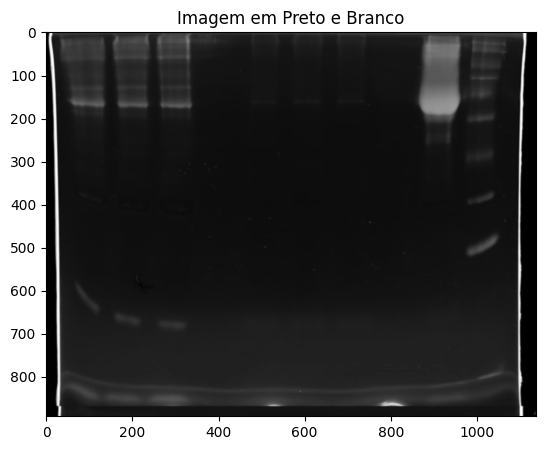

In [20]:
imagem_cinza_1 = processamento_imagem(teste1, mostrar) # transformar a imagem em preto e branco com a função processamento_imagem

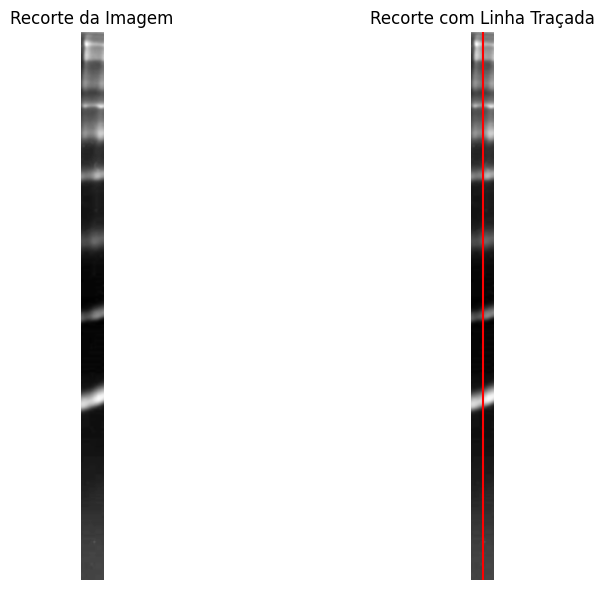

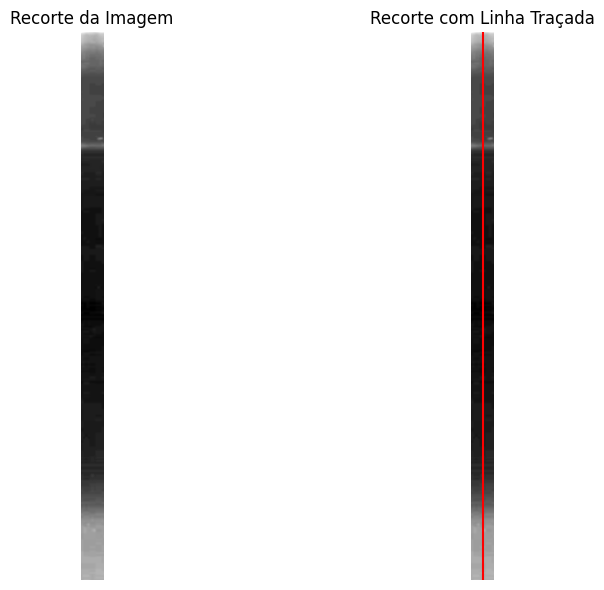

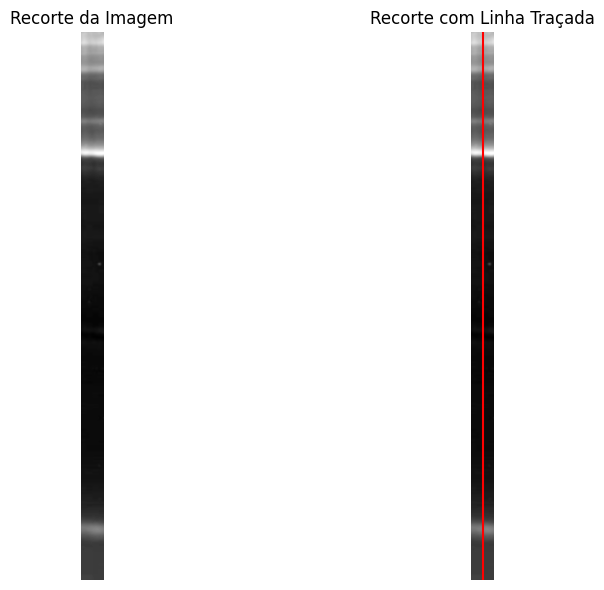

In [21]:
recorte_1 = recortar_imagem(imagem_cinza_1, x_1, y_1, mostrar) # usa a função recortar_imagem para criar 3 regiões de recorte na imagem cinza
recorte_2 = recortar_imagem(imagem_cinza_1, x_2, y_2, mostrar)
recorte_3 = recortar_imagem(imagem_cinza_1, x_3, y_3, mostrar)

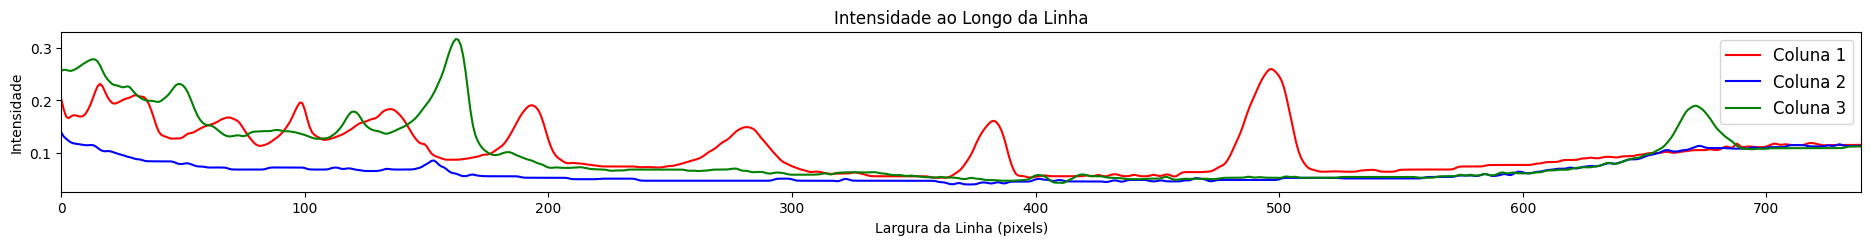

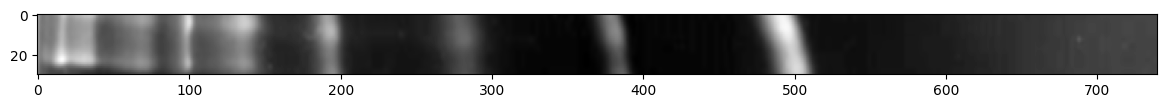

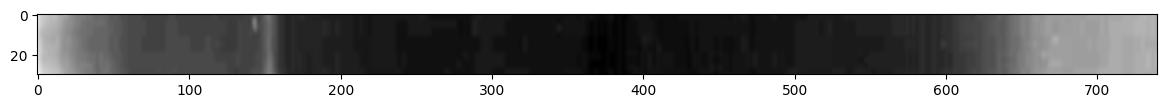

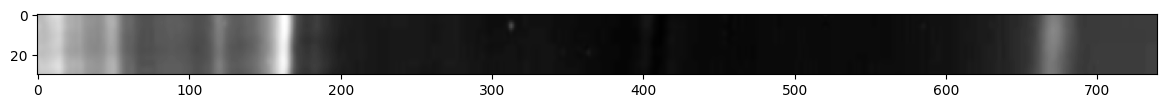

In [22]:
recortes_teste = [recorte_1, recorte_2, recorte_3] # guarda as regiões cortadas em uma lista para plotar os resultados

plotar_resultados(recortes_teste) # usa a função plotar_resultados para visualizar as intensidade de luz em cada banda

### Com mostrar = False

In [23]:
imagem_original = io.imread('ANDRE_NTC.png') # Abrir imagem 

imagem_rgb = ski.color.rgba2rgb(imagem_original)

teste1 = filtro(imagem_rgb, 'gaussiana', sigma=1) # aplicar um filtro que reduz ruido (media ou gaussiana)

x_1 = [1010, 1040] # setar onde você quer os cortes no eixo x (primeiro valor é o inicio e o segundo o fim)
y_1 = [30, 700] # setar onde você quer os cortes no eixo y (primeiro valor é o inicio e o segundo o fim)

x_2 = [520, 550]
y_2 = [30, 700]

x_3 = [200, 230]
y_3 = [30, 700]

mostrar = False # Define se quer ou não que apareçam os gráficos do processo (é importante quando estiver definindo onde cortar a imagem)

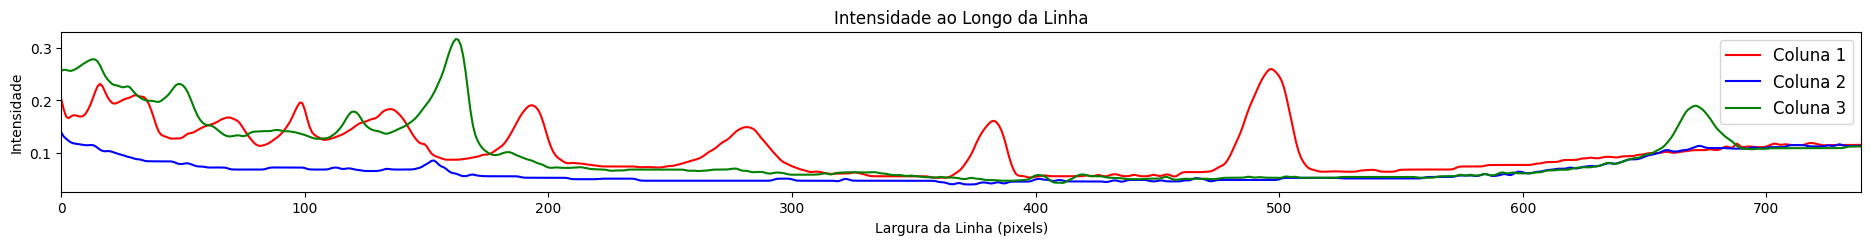

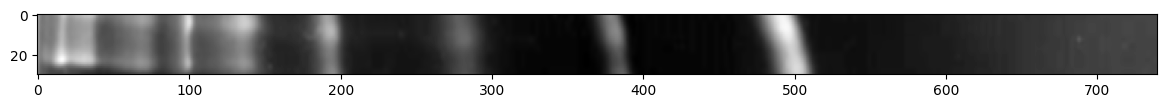

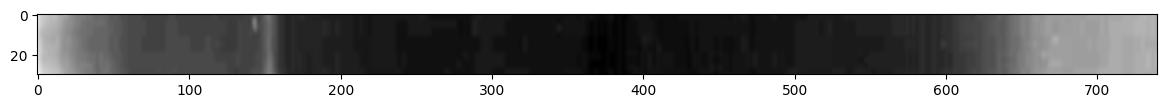

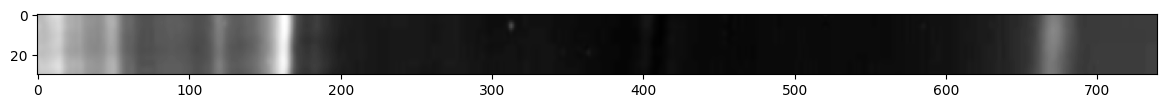

In [24]:
recortes_teste = [recorte_1, recorte_2, recorte_3] # guarda as regiões cortadas em uma lista para plotar os resultados

plotar_resultados(recortes_teste) # usa a função plotar_resultados para visualizar as intensidade de luz em cada banda

## Exemplo de uso dos filtros de redução de ruido

**Objetivo:** Realizar o corte na coluna de escada do gel e plotar ela sem filtro, com filtro de média e com filtro de gaussiana e comparar para ver qual filtro atua melhor.

Tamanho da imagem: 1137 x 892 pixels
Tamanho da imagem: 1137 x 892 pixels
Tamanho da imagem: 1137 x 892 pixels


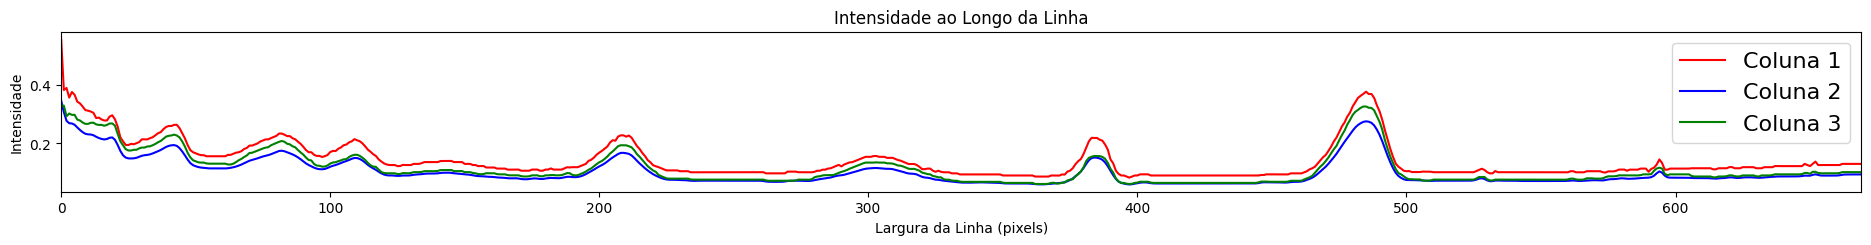

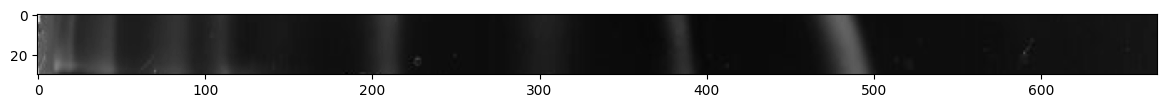

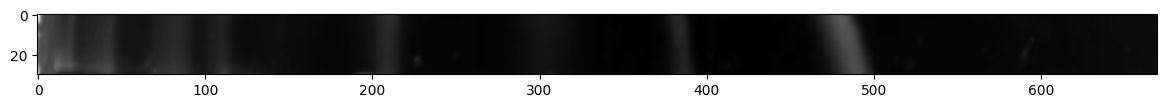

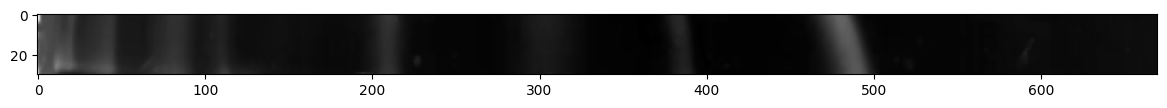

In [113]:
imagem_original_sem_filtro = io.imread('ANDRE_NTC.png') # Abrir imagem

imagem_original_sem_filtro = ski.color.rgba2rgb(imagem_original_sem_filtro)

teste_sem_filtro = imagem_original_sem_filtro
teste_com_filtro_gaussiana = filtro(imagem_original_sem_filtro, 'gaussiana', sigma=1)
teste_com_filtro_media = filtro(imagem_original_sem_filtro, 'media', sigma=1)

x_escada = [1010, 1040] # setar onde você quer os cortes no eixo x (primeiro valor é o inicio e o segundo o fim)
y_escada = [30, 700] # setar onde você quer os cortes no eixo y (primeiro valor é o inicio e o segundo o fim)

mostrar = False # Define se quer ou não que apareçam os gráficos do processo (é importante quando estiver definindo onde cortar a imagem)

imagem_cinza_sem_filtro = processamento_imagem(teste_sem_filtro, mostrar) # transformar a imagem em preto e branco com a função processamento_imagem
imagem_cinza_gaussiana = processamento_imagem(teste_com_filtro_gaussiana, mostrar) 
imagem_cinza_media = processamento_imagem(teste_com_filtro_media, mostrar) 

recorte_1 = recortar_imagem(imagem_cinza_sem_filtro, x_escada, y_escada, mostrar) # usa a função recortar_imagem para criar 3 regiões de recorte na imagem cinza
recorte_2 = recortar_imagem(imagem_cinza_gaussiana, x_escada, y_escada, mostrar)
recorte_3 = recortar_imagem(imagem_cinza_media, x_escada, y_escada, mostrar)

recortes_teste = [recorte_1, recorte_2, recorte_3] # guarda as regiões cortadas em uma lista para plotar os resultados

plotar_resultados(recortes_teste) # usa a função plotar_resultados para visualizar as intensidade de luz em cada banda

Como podemos notar ambos os filtros de redução de ruído atuaram muito bem. Tivemos uma grande diferença da coluna 1 (linha vermelha), sem tratamento, para a coluna 2 (linha azul) , que é o filtro utilizando o método da gaussiana, e a coluna 3 (linha verde) que utiliza o filtro das médias.

Em conclusão voce vai ter que variar entre esses dois filtros para o que melhor se adequa nas suas imagens.

# Análise Andre

In [25]:
imagem_original = io.imread('GO_NTC_TEMP.jpg') # Abrir imagem 

#imagem_rgb = ski.color.rgba2rgb(imagem_original)

teste1 = filtro(imagem_original, 'gaussiana', sigma=1) # aplicar um filtro que reduz ruido (media ou gaussiana)

x_4 = [320, 350] # setar onde você quer os cortes no eixo x (primeiro valor é o inicio e o segundo o fim)
y_4 = [40, 950] # setar onde você quer os cortes no eixo y (primeiro valor é o inicio e o segundo o fim)

x_24 = [520, 550]
y_24 = [40, 950]

x_37 = [875, 905]
y_37 = [50, 960]

mostrar = True # Define se quer ou não que apareçam os gráficos do processo (é importante quando estiver definindo onde cortar a imagem)

Tamanho da imagem: 2214 x 1029 pixels


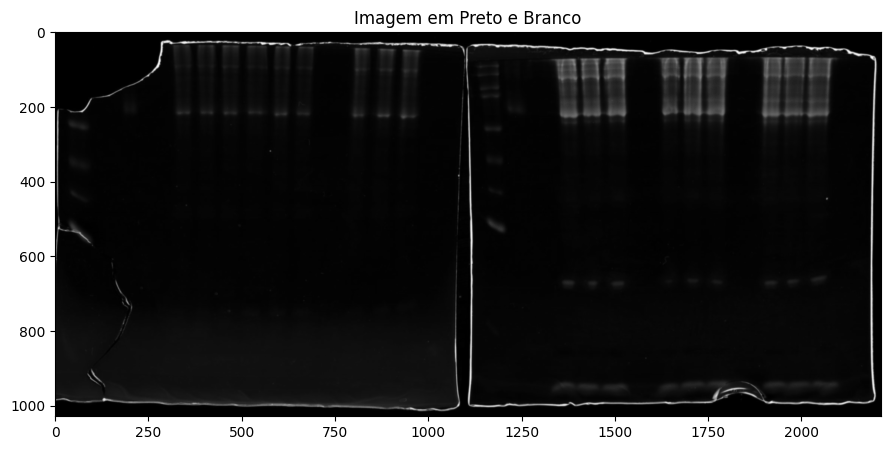

In [26]:
imagem_cinza_NTC = processamento_imagem(teste1, mostrar) # transformar a imagem em preto e branco com a função processamento_imagem

In [27]:
recorte_NTC_4 = recortar_imagem(imagem_cinza_NTC, x_4, y_4, False)
recorte_NTC_24 = recortar_imagem(imagem_cinza_NTC, x_24, y_24, False)
recorte_NTC_37 = recortar_imagem(imagem_cinza_NTC, x_37, y_37, False)

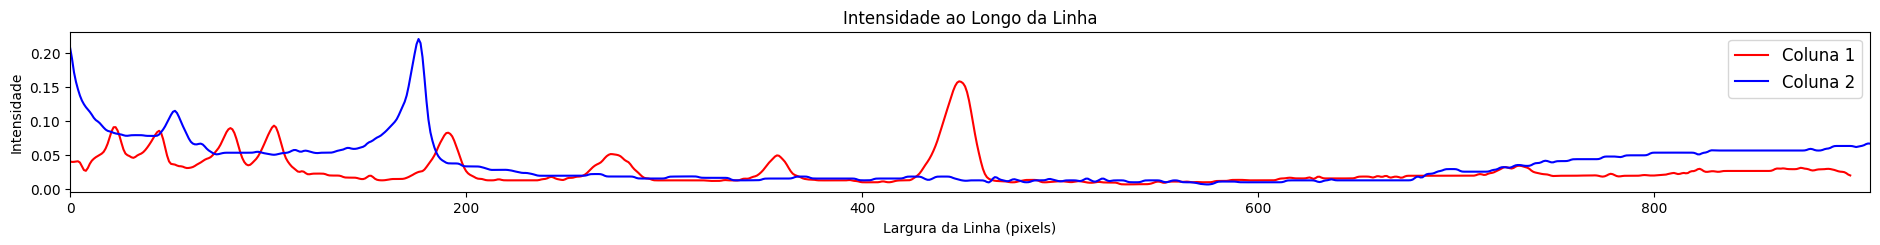

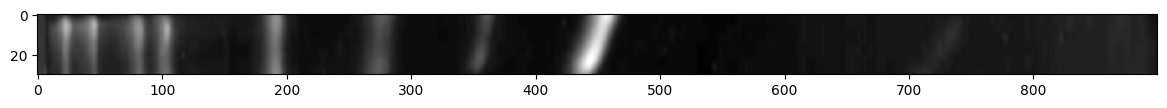

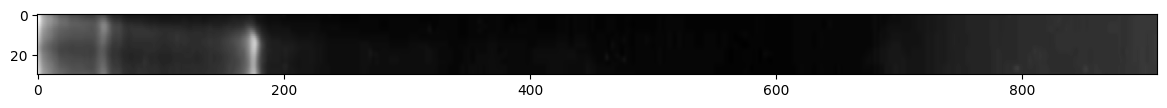

In [36]:
recortes_temp = [recorte_esc_GO, recorte_NTC_37]

plotar_resultados(recortes_temp)

# Análise Beatriz

In [29]:
imagem_original = io.imread('GO_NTC_TEMP.jpg') # Abrir imagem 

#imagem_rgb = ski.color.rgba2rgb(imagem_original)

teste2 = filtro(imagem_original, 'gaussiana', sigma=1) # aplicar um filtro que reduz ruido (media ou gaussiana)

x_4 = [1375-10, 1405-10]
y_4 = [75, 975]

x_24 = [1720-20, 1750-20] # setar onde você quer os cortes no eixo x (primeiro valor é o inicio e o segundo o fim)
y_24 = [70, 970] # setar onde você quer os cortes no eixo y (primeiro valor é o inicio e o segundo o fim)

x_37 = [2000-30, 2000+0]
y_37 = [70, 970]

x_es = [1050+ 110, 1080+110]
y_es = [70, 970]

mostrar = True # Define se quer ou não que apareçam os gráficos do processo (é importante quando estiver definindo onde cortar a imagem)

Tamanho da imagem: 2214 x 1029 pixels


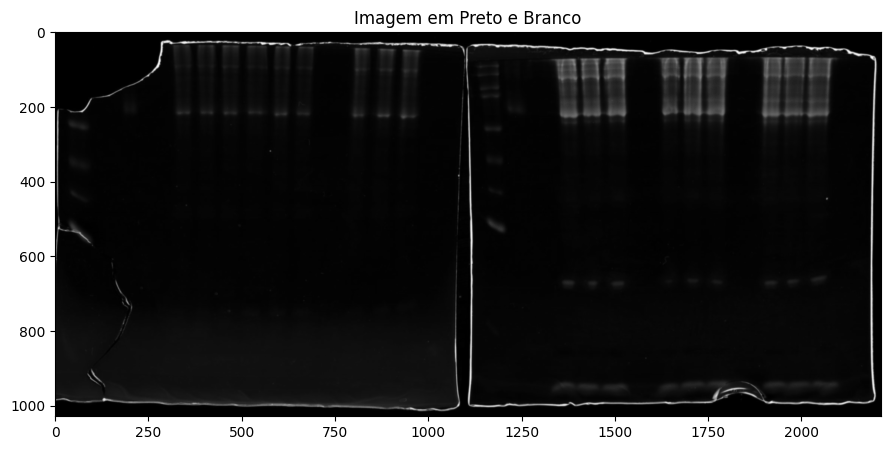

In [30]:
imagem_cinza_GO = processamento_imagem(teste2, mostrar) # transformar a imagem em preto e branco com a função processamento_imagem

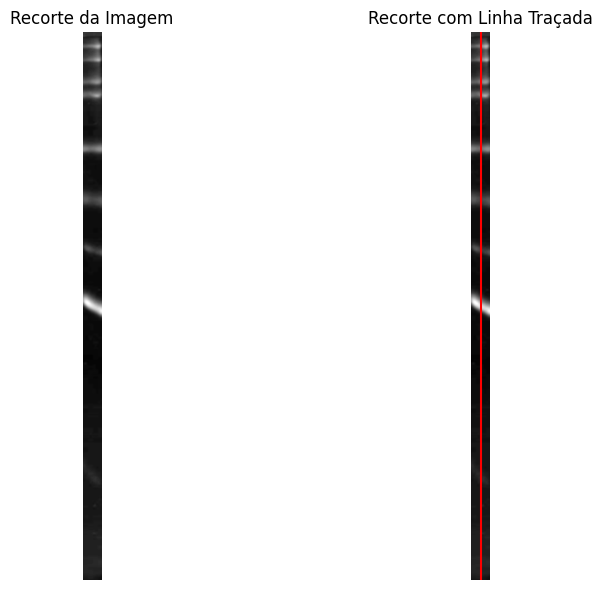

In [31]:
recorte_GO_4 = recortar_imagem(imagem_cinza_GO, x_4, y_4, False)
recorte_GO_24 = recortar_imagem(imagem_cinza_GO, x_24, y_24, False)
recorte_GO_37 = recortar_imagem(imagem_cinza_GO, x_37, y_37, False)
recorte_esc_GO = recortar_imagem(imagem_cinza_GO, x_es, y_es, True)

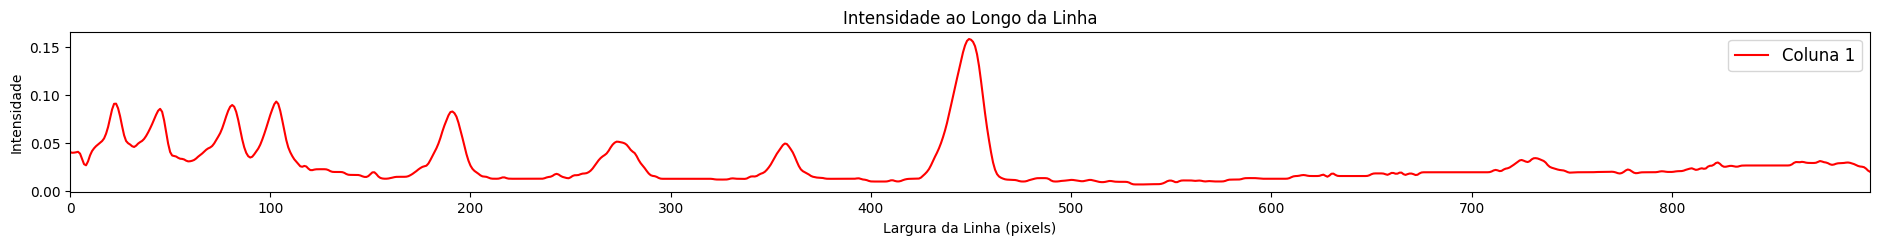

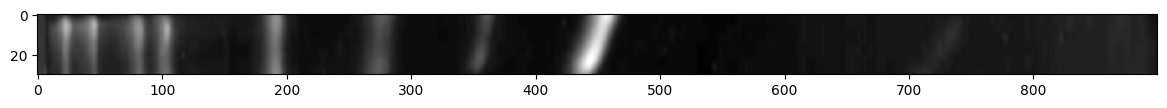

In [38]:
recortes_GO = [recorte_esc_GO]

#recortes_GO.reverse()

plotar_resultados(recortes_GO)

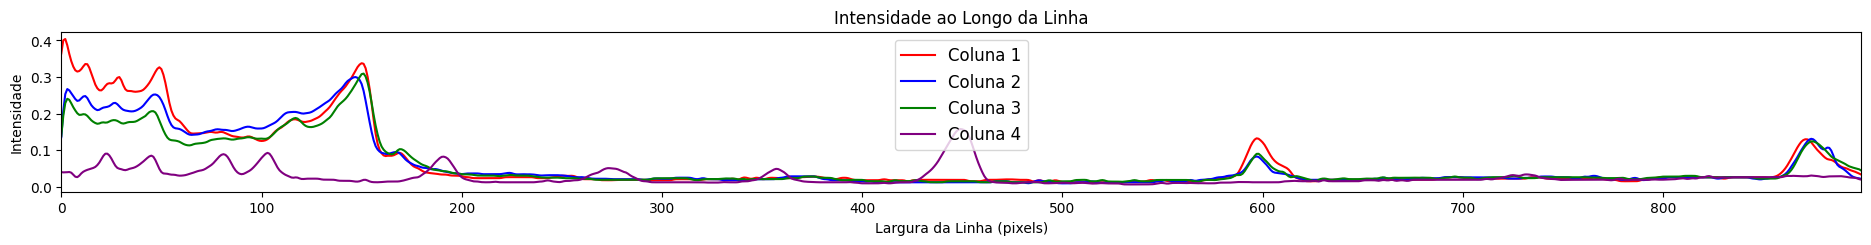

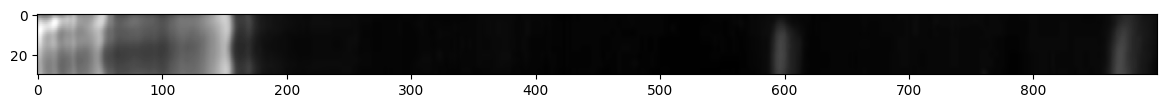

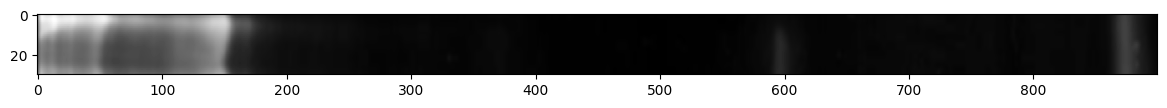

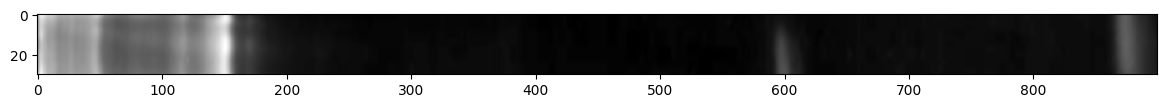

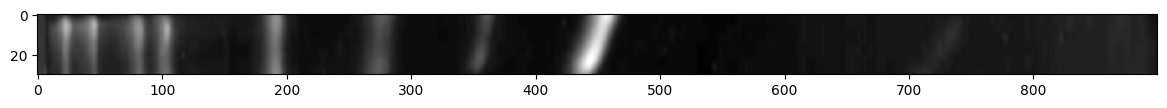

In [35]:
recortes_comparacao = [recorte_GO_4, recorte_GO_24, recorte_GO_37, recorte_esc_GO]

plotar_resultados(recortes_comparacao)

# Bradford

In [4]:
bia = [0.03833333, 0.041,0.054667,0.066, 0.085667, 0.115667, 0.136333, 0.181667, 0.205, 0.209667]

andre = [0.295333333,0.226, 0.177, 0.193, 0.145667, 0.113667, 0.092, 0.060667, 0.057, 0.032667]
andre.reverse()

certo = [0.0195, 0.04025, 0.063, 0.079, 0.11425, 0.14975, 0.17775, 0.2085, 0.22025, 0.28475]

x = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,100]

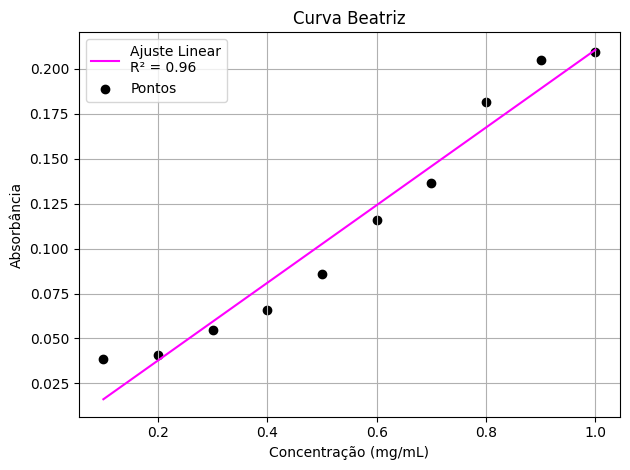

In [15]:
plt.figure()
plt.plot(x, bia_fit, label=f'Ajuste Linear\nR² = {r2_bia:.2f}', color='fuchsia')
plt.scatter(x, bia, label='Pontos', color='black')
plt.title('Curva Beatriz')
plt.xlabel('Concentração (mg/mL)')
plt.ylabel('Absorbância')
plt.legend()
plt.grid()
plt.savefig("curva_bia.png")

# Mostrar os gráficos
plt.tight_layout()
plt.show()

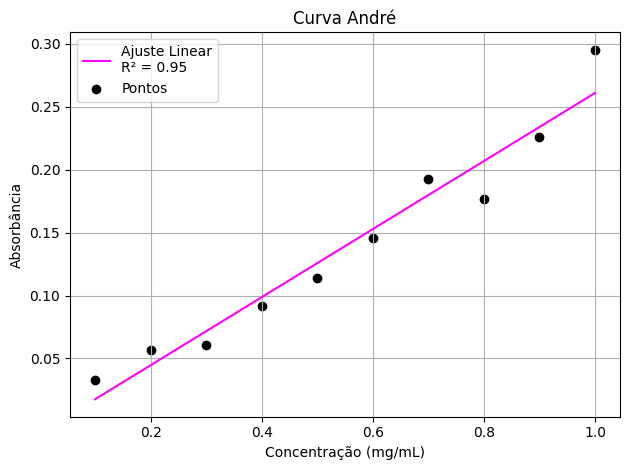

In [14]:
plt.figure()
plt.plot(x, andre_fit, label=f'Ajuste Linear\nR² = {r2_andre:.2f}', color='fuchsia')
plt.scatter(x, andre, label='Pontos', color='black')
plt.title('Curva André')
plt.xlabel('Concentração (mg/mL)')
plt.ylabel('Absorbância')
plt.grid()
plt.legend()
plt.savefig("curva_andre.png")

# Mostrar os gráficos
plt.tight_layout()
plt.show()

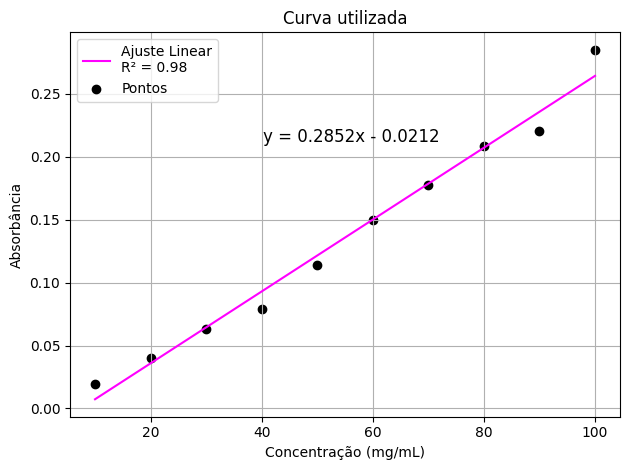

In [22]:
plt.figure()
plt.plot(x, certo_fit, label=f'Ajuste Linear\nR² = {r2_certo:.2f}', color='fuchsia')
plt.scatter(x, certo, label='Pontos', color='black')
plt.title('Curva utilizada')
plt.xlabel('Concentração (mg/mL)')
plt.ylabel('Absorbância')
plt.legend()
plt.grid()
plt.annotate(f'y = 0.2852x - 0.0212', xy=(0.35, 0.75), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top')
plt.savefig("curva_certa.png")

# Mostrar os gráficos
plt.tight_layout()
plt.show()

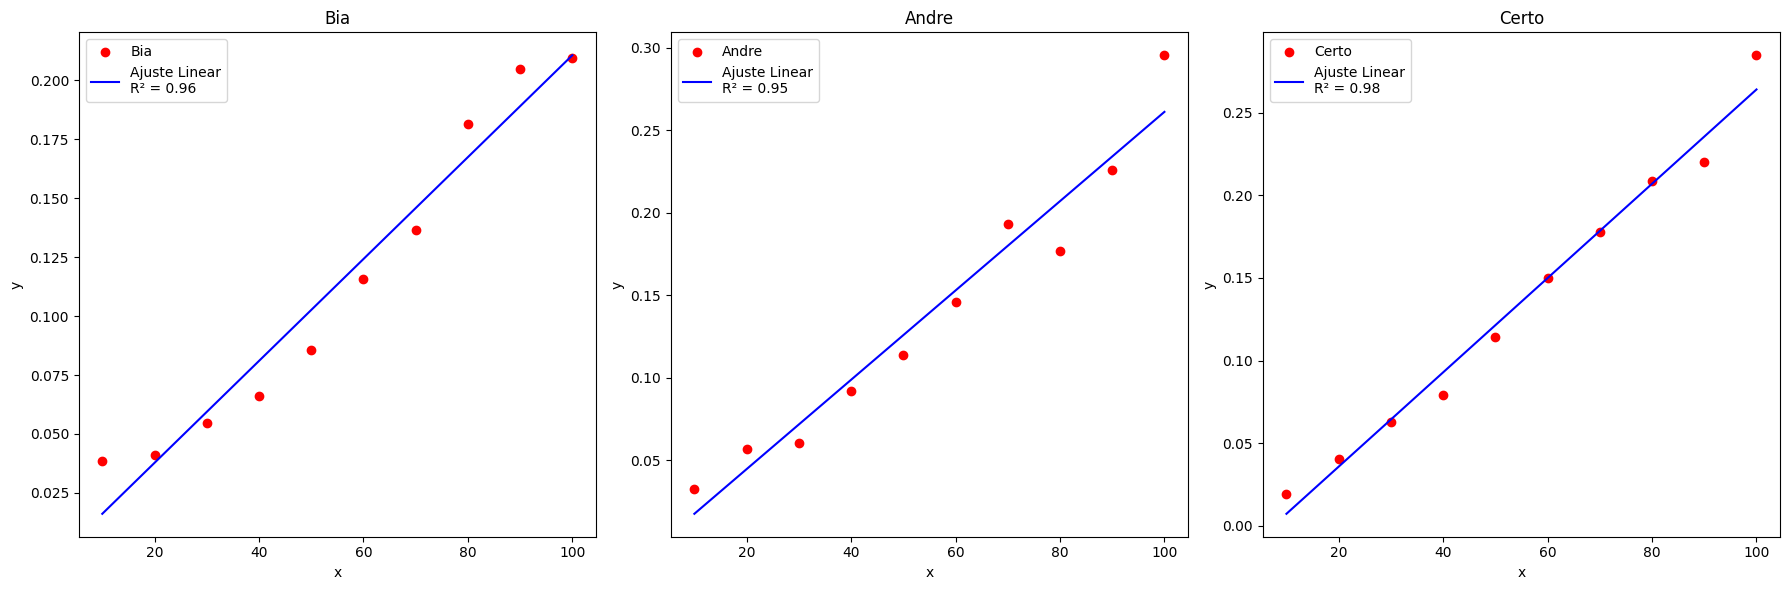

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dados fornecidos
bia = [0.03833333, 0.041, 0.054667, 0.066, 0.085667, 0.115667, 0.136333, 0.181667, 0.205, 0.209667]
andre = [0.295333333, 0.226, 0.177, 0.193, 0.145667, 0.113667, 0.092, 0.060667, 0.057, 0.032667]
andre.reverse()
certo = [0.0195, 0.04025, 0.063, 0.079, 0.11425, 0.14975, 0.17775, 0.2085, 0.22025, 0.28475]
x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Função linear para ajuste
def linear_function(x, a, b):
    return a * x + b

# Ajustar cada conjunto de dados
params_bia, _ = curve_fit(linear_function, x, bia)
params_andre, _ = curve_fit(linear_function, x, andre)
params_certo, _ = curve_fit(linear_function, x, certo)

# Calcular R²
def calculate_r_squared(y, y_fit):
    residuals = y - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Calcular valores ajustados
bia_fit = linear_function(np.array(x), *params_bia)
andre_fit = linear_function(np.array(x), *params_andre)
certo_fit = linear_function(np.array(x), *params_certo)

# Calcular R² para cada ajuste
r2_bia = calculate_r_squared(np.array(bia), bia_fit)
r2_andre = calculate_r_squared(np.array(andre), andre_fit)
r2_certo = calculate_r_squared(np.array(certo), certo_fit)

# Plotar os dados e os ajustes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plotar bia
axs[0].scatter(x, bia, label='Bia', color='red')
axs[0].plot(x, bia_fit, label=f'Ajuste Linear\nR² = {r2_bia:.2f}', color='blue')
axs[0].set_title('Bia')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Plotar andre
axs[1].scatter(x, andre, label='Andre', color='red')
axs[1].plot(x, andre_fit, label=f'Ajuste Linear\nR² = {r2_andre:.2f}', color='blue')
axs[1].set_title('Andre')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()

# Plotar certo
axs[2].scatter(x, certo, label='Certo', color='red')
axs[2].plot(x, certo_fit, label=f'Ajuste Linear\nR² = {r2_certo:.2f}', color='blue')
axs[2].set_title('Certo')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].legend()

# Mostrar os gráficos
plt.tight_layout()
plt.show()
